# Exercise 2

**Remember**
   * You are expected to use numpy and scipy libraries where appropriate.  
   * You should run each cell in order from the top of the notebook; there is no need to repeat code between cells
   * Use the "refresh kernel" button to reset everything and start again
   * Make sure your notebook runs fully & without errors, from a fresh kernel, before submitting it

# Problem Overview

In this problem we will find eigenvalues of the 1D Schrödinger equation using numerical methods.

The time-independent Schrödinger equation in 1D can be written :

\begin{equation}
H \psi = E \psi \label{eq1}\tag{1}
\end{equation}

Where the Hamiltonian $H$ is given by 

$$
H = \frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + V \tag{2}
$$

In order to find numerical solutions, we can divide the spatial dimension into $N$ discrete points, $x_i$, and evaluate $\psi$ at each one.  Given this, equation \ref{eq1} becomes a matrix equation, with $\psi$ an $N$-dimensional vector, and $H$ an $(N \times N)$ matrix.  We can then find the eigenvalues and eigenfunctions of the equation using numerical methods.

In order to define the matrix $H$, we can use a discrete approximation of the 2nd derivative :
$$
\frac{d^2}{dx^2} \psi(x_i) \rightarrow \frac{\psi_{i-1} - 2\psi_i + \psi_{i+1}}{(\Delta x)^2}
$$

where $(\Delta x)$ is the distance between discrete points $x_i$. We will choose dimensionless units for each problem, where $x$ is measured in terms of a length $a$, and $E$ is therefore measured in units of $\frac{\hbar^2}{2m a^2}$.  We can therefore write the kinetic energy term of the Hamiltonian as a "tri-diagonal" matrix $D$, which has the leading diagonal :

$$D_{i,i} = \frac{2}{(\Delta x)^2}$$

and the diagonals above and below this are :

$$D_{i,i+1} = D_{i,i-1} = \frac{-1}{(\Delta x)^2}$$

The potential term $V \psi$ can be represented by a matrix where the leading diagonal is the potential evaluated at the $i$-th point in space, $V_{i,i} = V(x_i)$, and all other entries are zero.

Given a potential, we construct the Hamiltonian matrix, $H=D+V$, and then use a numerical method to find the eigenvalues and eigenvectors of $H$.

## Part 1

The quantum harmonic oscillator is a good example to start with, since it has exact analytic solutions. The potential is :
$$V(x) = \frac{1}{2}m \omega^2 x^2$$

If we choose to measure $x$ in units of $\sqrt{\frac{\hbar}{m \omega}}$, then $E$ will be measured in units of $\frac{1}{2}\hbar \omega$, and the potential can be written :

$$V(x_i) = i^2 (\Delta x)^2 = x_i^2$$

You should write a function which takes as argument a discrete set of space points, $x_i$, (ie. an array), and returns the potential at each point, $V_i$ (another array).

In [1]:
import numpy as np

deltax = 0.005 
xvals = np.arange(-5,5+deltax,deltax) # domain chosen to observe symmetry of qho

v = lambda x: x**2             # lambda function for potential expression because used throughout exercise and
                               # only requres 
potential_qho = v(xvals)

print(potential_qho)


[25.       24.950025 24.9001   ... 24.9001   24.950025 25.      ]


Now test your function by plotting the results over a suitable range of $x$.

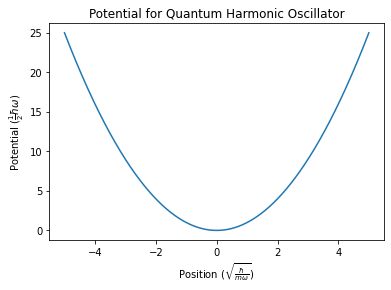

In [2]:
import matplotlib.pyplot as plt

plt.plot(xvals, potential_qho)
plt.title('Potential for Quantum Harmonic Oscillator')
plt.xlabel(r'Position ($\sqrt{\frac{\hbar}{m \omega}}$)') #dimensions of data
plt.ylabel(r'Potential ($\frac{1}{2}\hbar \omega$)')
plt.show()

# Part 2

Now write a function which, given the discrete space points $x_i$ and the potential $V_i$, constructs and returns the Hamiltonian matrix.

In [3]:
def hamiltonian(xvals, potential_qho, deltax):
    """Function takes arrays of discrete space points and potentials, constructs tridiagonal matrices
    and returns the Hamiltonian matrix, given by H = D + V.
    """
    potential_diag = np.diag(potential_qho) # creates diagonal matrix from potentials
    
    # forming tridiagonal matrix for kinetic energies
    
    D0 = np.full(len(xvals),2/(deltax**2)) 
    D1 = np.full(len(xvals)-1,-1/(deltax**2))

    D0_diag = np.diag(D0, k=0) 
    D1neg_diag = np.diag(D1, k=-1) 
    D1pos_diag = np.diag(D1, k=1) 

    kinetic_tridiag = D0_diag + D1pos_diag + D1neg_diag

    H = potential_diag + kinetic_tridiag
    return H

hamiltonian_qho = hamiltonian(xvals, potential_qho, deltax)


Test your function by printing the matrix it returns.  You can use small $N$ and check a few elements by hand to ensure they are correct.

In [4]:
print(hamiltonian_qho)

# test matrix to ensure function returns correct form tridiagonal matrix

potential_test = v(np.arange(-5,6))
hamiltonian_test = hamiltonian(np.arange(-5,6), potential_test, deltax=1)
print(hamiltonian_test)

[[ 80025.       -40000.            0.       ...      0.
       0.            0.      ]
 [-40000.        80024.950025 -40000.       ...      0.
       0.            0.      ]
 [     0.       -40000.        80024.9001   ...      0.
       0.            0.      ]
 ...
 [     0.            0.            0.       ...  80024.9001
  -40000.            0.      ]
 [     0.            0.            0.       ... -40000.
   80024.950025 -40000.      ]
 [     0.            0.            0.       ...      0.
  -40000.        80025.      ]]
[[27. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1. 18. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1. 11. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  6. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  3. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  3. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  6. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1. 11. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1. 18. -1.

# Part 3

Now find the first 10 eigenvalues of the quantum harmonic oscillator Hamiltonian using an appropriate scipy routine. You should use a large number of $x$ points, at least 1000, covering sufficient range that the wavefunction falls to zero at the extremities. You should compare the computed eigenvalues with the expected eigenvalues.

Computed Eigenvalues:  [ 0.99999844  2.99999219  4.99997985  6.99996328  8.99996022 11.00009489
 13.00103105 15.00549844 17.02208203 19.07109378]
Expected Eigenvalues:  [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


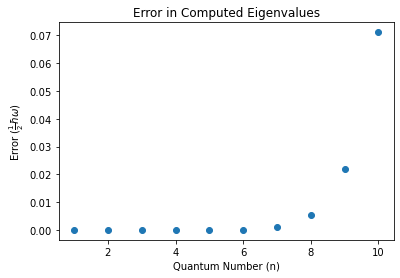

In [5]:
import scipy.linalg as linalg

mus, psis = linalg.eigh(hamiltonian_qho)       # linalg.eigh returns eigenvalues in order, so no sorting necessary
lams = [(2*n+1) for n in range(10)]            

print("Computed Eigenvalues: ",mus[:10])
print("Expected Eigenvalues: ",lams)

error = abs(lams-mus[:10])

plt.scatter(range(1,11),error)
plt.title('Error in Computed Eigenvalues')
plt.xlabel('Quantum Number (n)')
plt.ylabel(r'Error ($\frac{1}{2}\hbar \omega$)')
plt.show()

Next you should plot the wavefunctions, ie. the eigenvectors.  Rather than plot the wavefunction directly, you should plot the probability density, which is given by $\psi^2$, and indicates the probability to find the particle at position $x$.

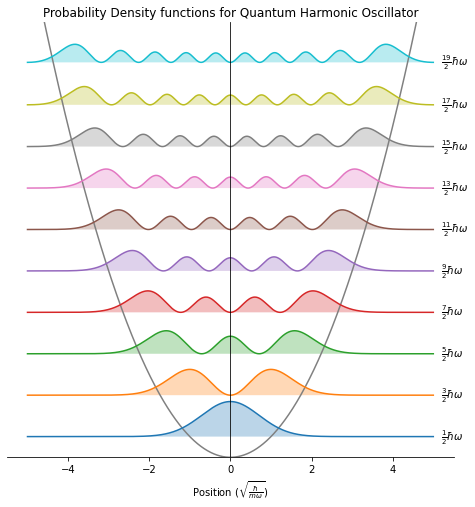

In [6]:
probability_density = ((psis.T)[:10]**2)     # the eigenvectors are transposed because of the shape they are returned
                                             # in by linalg.eigh function
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(xvals, potential_qho, color='gray')
[ax.plot(xvals, 600*probability_density[i]+mus[i]) for i in range(0,10)]    # 600* scaling so that probability
ax.set_ylim([0,21])                                                         # density functions visible
[ax.fill_between(xvals, mus[i], 600*probability_density[i]+mus[i],alpha=0.3) for i in range(0,10)]

ax.axvline(x=0, color='k', lw=0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)

[ax.text(s=r'$\frac{{{}}}{{2}}\hbar\omega$'.format(2*i+1), x=xvals[2000]+0.2, y=mus[i], va='center') for i in range(0,10)]

plt.title('Probability Density functions for Quantum Harmonic Oscillator')
plt.xlabel(r'Position ($\sqrt{\frac{\hbar}{m \omega}}$)')
plt.show()

## Part 4

Having verified our method, we can use it to find the eigenvalues of a more complex system - the Hydrogen atom.  In a spherically symmetric system, the wavefunction can be written :

$$\frac{1}{r}\Psi(r)Y_{lm}(\theta, \phi)e^{i m\phi}$$

where $Y_{lm}(\theta, \phi)$ are the spherical harmonic functions and l, m are the angular momentum quantum numbers. The radial function $\Psi(r)$ satisfies the time-independent Schrödinger equation, provided a suitable term is added to the potential.

If we use the Bohr radius $a_0$ as the unit $r$, where :
$$a_0 = \frac{4 \pi \epsilon \hbar^2}{m_e e^2}$$

then the energy will be measured in units of :
$$\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$$

and the potential for the hydrogen atom can be written :

$$V(r_i) = \frac{-2}{r_i} + \frac{l(l+1)}{r_i^2}$$

Write a function which takes as argument a discrete set of points, $r_i$, and returns the potential $V_i$. You should use a range of $r$ such that the wavefunction become negligible - 200 Bohr radii should be sufficient.  Note that $r$ must now be positive.

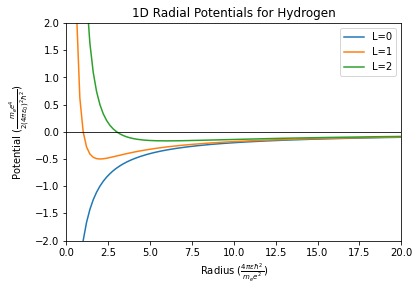

In [7]:
deltar = 0.2
l = np.array([0,1,2])
rvals = np.arange(deltar, 200, deltar)

vh = lambda x, y : ((-2/x) + y*(y+1)/(x**2))    # hydrogen potential

potential_hydrogen = [vh(rvals,l[i]) for i in range(3)]

fig, ax = plt.subplots()

ax.plot(rvals,potential_hydrogen[0],label='L=0')
ax.plot(rvals,potential_hydrogen[1],label='L=1')
ax.plot(rvals,potential_hydrogen[2],label='L=2')
ax.legend()

ax.set_ylim([-2,2])
ax.set_xlim([0,20])
ax.axhline(y=0,color='k',lw=0.8)

plt.title('1D Radial Potentials for Hydrogen')
plt.ylabel(r'Potential ($\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$)')
plt.xlabel(r'Radius ($\frac{4 \pi \epsilon \hbar^2}{m_e e^2}$)')
plt.show()

Now re-use the `hamiltonian()` function to generate the Hamiltonian matrix for the Hydrogren atom, and find at least the first 5 eigenvalues for at least l=0. Compare these eigenvalues with the expected eigenvalues.

Computed Hydrogen Eigenvalues for l=0  [-0.99019514 -0.24937811 -0.11098793 -0.06246099 -0.03998401]
Computed Hydrogen Eigenvalues for l=1  [-0.25020961 -0.11120765 -0.06254973 -0.04002851 -0.02779552]
Computed Hydrogen Eigenvalues for l=2  [-0.11111934 -0.06250781 -0.04000594 -0.02778212 -0.02041134]

Expected Hydrogen Eigenvalues for l=0  [-1.0, -0.25, -0.1111111111111111, -0.0625, -0.04]
Expected Hydrogen Eigenvalues for l=1  [-0.25, -0.1111111111111111, -0.0625, -0.04, -0.027777777777777776]
Expected Hydrogen Eigenvalues for l=2  [-0.1111111111111111, -0.0625, -0.04, -0.027777777777777776, -0.02040816326530612]


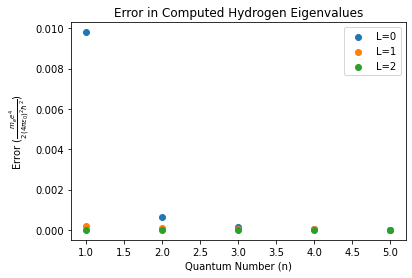

In [8]:
hamiltonian_hydrogen = [hamiltonian(rvals, potential_hydrogen[i], deltar) for i in range(3)]

eigvalues0, eigstates0 = linalg.eigh(hamiltonian_hydrogen[0])
eigvalues1, eigstates1 = linalg.eigh(hamiltonian_hydrogen[1])
eigvalues2, eigstates2 = linalg.eigh(hamiltonian_hydrogen[2])

eigvals_five = [eigvalues0[:5],eigvalues1[:5],eigvalues2[:5]]
eigvals_expected = [-1/n**2 for n in range(1,8)]

[print("Computed Hydrogen Eigenvalues for l="+str(i)+" ",eigvals_five[i]) for i in range(3)]
print( )
[print("Expected Hydrogen Eigenvalues for l="+str(i)+" ",eigvals_expected[i:5+i]) for i in range(3)]

eig_error = [abs(eigvals_five[i]-eigvals_expected[i:5+i]) for i in range(3)]

[plt.scatter(range(1,6),eig_error[i],label='L='+str(i)) for i in range(3)]
plt.legend()

plt.title('Error in Computed Hydrogen Eigenvalues')
plt.xlabel('Quantum Number (n)')
plt.ylabel(r'Error ($\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$)')
plt.show()

Finally, as for the quantum harmonic oscillator, plot the wavefunctions.

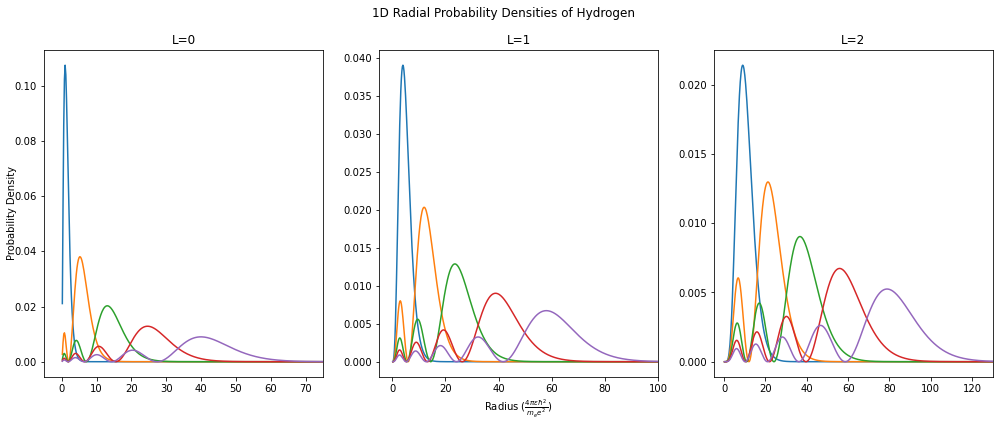

In [9]:
eigstates_five = [eigstates0.T[:5], eigstates1.T[:5], eigstates2.T[:5]]

probdens_hydrogen = [(eigstates_five[i])**2 for i in range(3)]

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(17, 6))

[ax1.plot(rvals,probdens_hydrogen[0][i]) for i in range(5)]
[ax2.plot(rvals,probdens_hydrogen[1][i]) for i in range(5)]
[ax3.plot(rvals,probdens_hydrogen[2][i]) for i in range(5)]

ax1.set_title('L=0')
ax2.set_title('L=1')
ax3.set_title('L=2')

ax1.set_xlim([-5,75])
ax2.set_xlim([-5,100])
ax3.set_xlim([-5,130])

fig.suptitle('1D Radial Probability Densities of Hydrogen')
fig.add_subplot(111,frameon=False)

plt.xlabel(r'Radius ($\frac{4 \pi \epsilon \hbar^2}{m_e e^2}$)')
plt.ylabel('Probability Density')
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.show()

# Part 5

In the Markdown cell below, describe how your code solves the problem set. State any equations used in the solution and how they were obtained. Include your reasons for any libraries you used, as well as any particular programming techniques. Explain your choice of any test cases. Finally, state any salient features of the results you obtained. You are not expected to write more than about 250-300 words.

The code constructs the hamiltonian matrix for qho and hydrogen atom and uses scipy linear algebra routine to solve the 1D time-independent Schrodinger equation. The eigenstates (wavefunctions) were then plotted as probability density functions, against the radius.

The hamiltonian constructor was the only regular function defined as others were merely expressions that could be attributed to a variable or passed through a more concise lambda function. The limited use of regularly defined functions was in order to improve the functionality of the code, and improve readability by not creating so many logical breaks in the code.

The scipy.linalg.eigh algorithm routine was employed over scipy.linalg.eig because the matrices used are square and tridiagonal, therefore they are symmetric. The linalg.eigh function requires that the matrix passed as an argument is symmetric, thus it is a faster algorithm, than linalg.eig which is intended for more general matrices. linalg.eigh has the added benefit that it sorts the eigenvalues, so an additional sorting routine isn't necessary.

From the error graphs, the error in the computed eigenvalue was drastically more significant for locations where the potential gradient was the largest. This is due to rounding errors in the Hamiltonian, affected by r values approaching zero.

For L(the Azimuthal quantum number)=0 the probability densities for hydrogen have a close distribution from 0, that spreads out progressively for L=1,2. This makes intuituve sense because of the greater radius for shell probabilities.

